In [1]:
import tensorflow as tf
import matplotlib
matplotlib.use('nbagg')


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print mnist.train.images.shape, mnist.train.labels.shape
print mnist.validation.images.shape, mnist.validation.labels.shape
print mnist.test.images.shape, mnist.test.labels.shape

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [5]:
TRAINING_ITER = 5000
BATCH_SIZE = 100
INPUT_UNITS = 784
HIDDEN_UNITS = 256
N_CLASSES = 10
LEARNING_RATE = 0.5

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape))

def init_biases(shape):
    return tf.Variable(tf.zeros(shape) + 0.1)

def add_layer(x, weights, biases, activation_function=None):
    score = tf.matmul(x, weights) + biases
    if activation_function:
        return activation_function(score)
    else:
        return score
    


In [6]:
x = tf.placeholder(tf.float32, [None, INPUT_UNITS])
y = tf.placeholder(tf.float32, [None, N_CLASSES])

weights = {'l1': init_weights([INPUT_UNITS, HIDDEN_UNITS]), 'l2': init_weights([HIDDEN_UNITS, N_CLASSES])}
biases = {'l1': init_biases([HIDDEN_UNITS]), 'l2': init_biases([N_CLASSES])}

h1 = add_layer(x, weights['l1'], biases['l1'], tf.nn.tanh)

predictions = add_layer(h1, weights['l2'], biases['l2'], None)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y, 1), tf.arg_max(predictions, 1)), tf.float32))

In [7]:
init = tf.global_variables_initializer()

train_acc = []
valid_acc = []
epoch = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(TRAINING_ITER):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        
        sess.run(train_step, feed_dict = {x: batch_xs, y: batch_ys})
        
        if i % 50 == 0:
            epoch.append(i)
            
            train_accuracy = sess.run(accuracy, feed_dict = {x: batch_xs, y: batch_ys})
            print 'TRAIN_ACC@%d' %i, train_accuracy
            train_acc.append(train_accuracy)
            
            valid_accuracy = sess.run(accuracy, feed_dict = {x: mnist.validation.images, y: mnist.validation.labels})
            print 'VALID_ACC@%d' %i, valid_accuracy
            valid_acc.append(valid_accuracy)
            
    print 'TEST_ACC', sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels})

TRAIN_ACC@0 0.35
VALID_ACC@0 0.1746
TRAIN_ACC@50 0.9
VALID_ACC@50 0.7546
TRAIN_ACC@100 0.9
VALID_ACC@100 0.7974
TRAIN_ACC@150 0.87
VALID_ACC@150 0.8414
TRAIN_ACC@200 0.95
VALID_ACC@200 0.8536
TRAIN_ACC@250 0.91
VALID_ACC@250 0.85
TRAIN_ACC@300 0.97
VALID_ACC@300 0.868
TRAIN_ACC@350 0.92
VALID_ACC@350 0.8716
TRAIN_ACC@400 0.92
VALID_ACC@400 0.8836
TRAIN_ACC@450 0.95
VALID_ACC@450 0.8882
TRAIN_ACC@500 0.94
VALID_ACC@500 0.8836
TRAIN_ACC@550 0.97
VALID_ACC@550 0.9038
TRAIN_ACC@600 0.95
VALID_ACC@600 0.9024
TRAIN_ACC@650 0.98
VALID_ACC@650 0.8962
TRAIN_ACC@700 0.96
VALID_ACC@700 0.8912
TRAIN_ACC@750 0.93
VALID_ACC@750 0.9032
TRAIN_ACC@800 0.97
VALID_ACC@800 0.9052
TRAIN_ACC@850 0.97
VALID_ACC@850 0.902
TRAIN_ACC@900 0.99
VALID_ACC@900 0.9062
TRAIN_ACC@950 0.98
VALID_ACC@950 0.9032
TRAIN_ACC@1000 0.98
VALID_ACC@1000 0.9142
TRAIN_ACC@1050 0.95
VALID_ACC@1050 0.9108
TRAIN_ACC@1100 0.96
VALID_ACC@1100 0.9144
TRAIN_ACC@1150 0.99
VALID_ACC@1150 0.9162
TRAIN_ACC@1200 0.96
VALID_ACC@1200 0.9094
TR

<IPython.core.display.Javascript object>


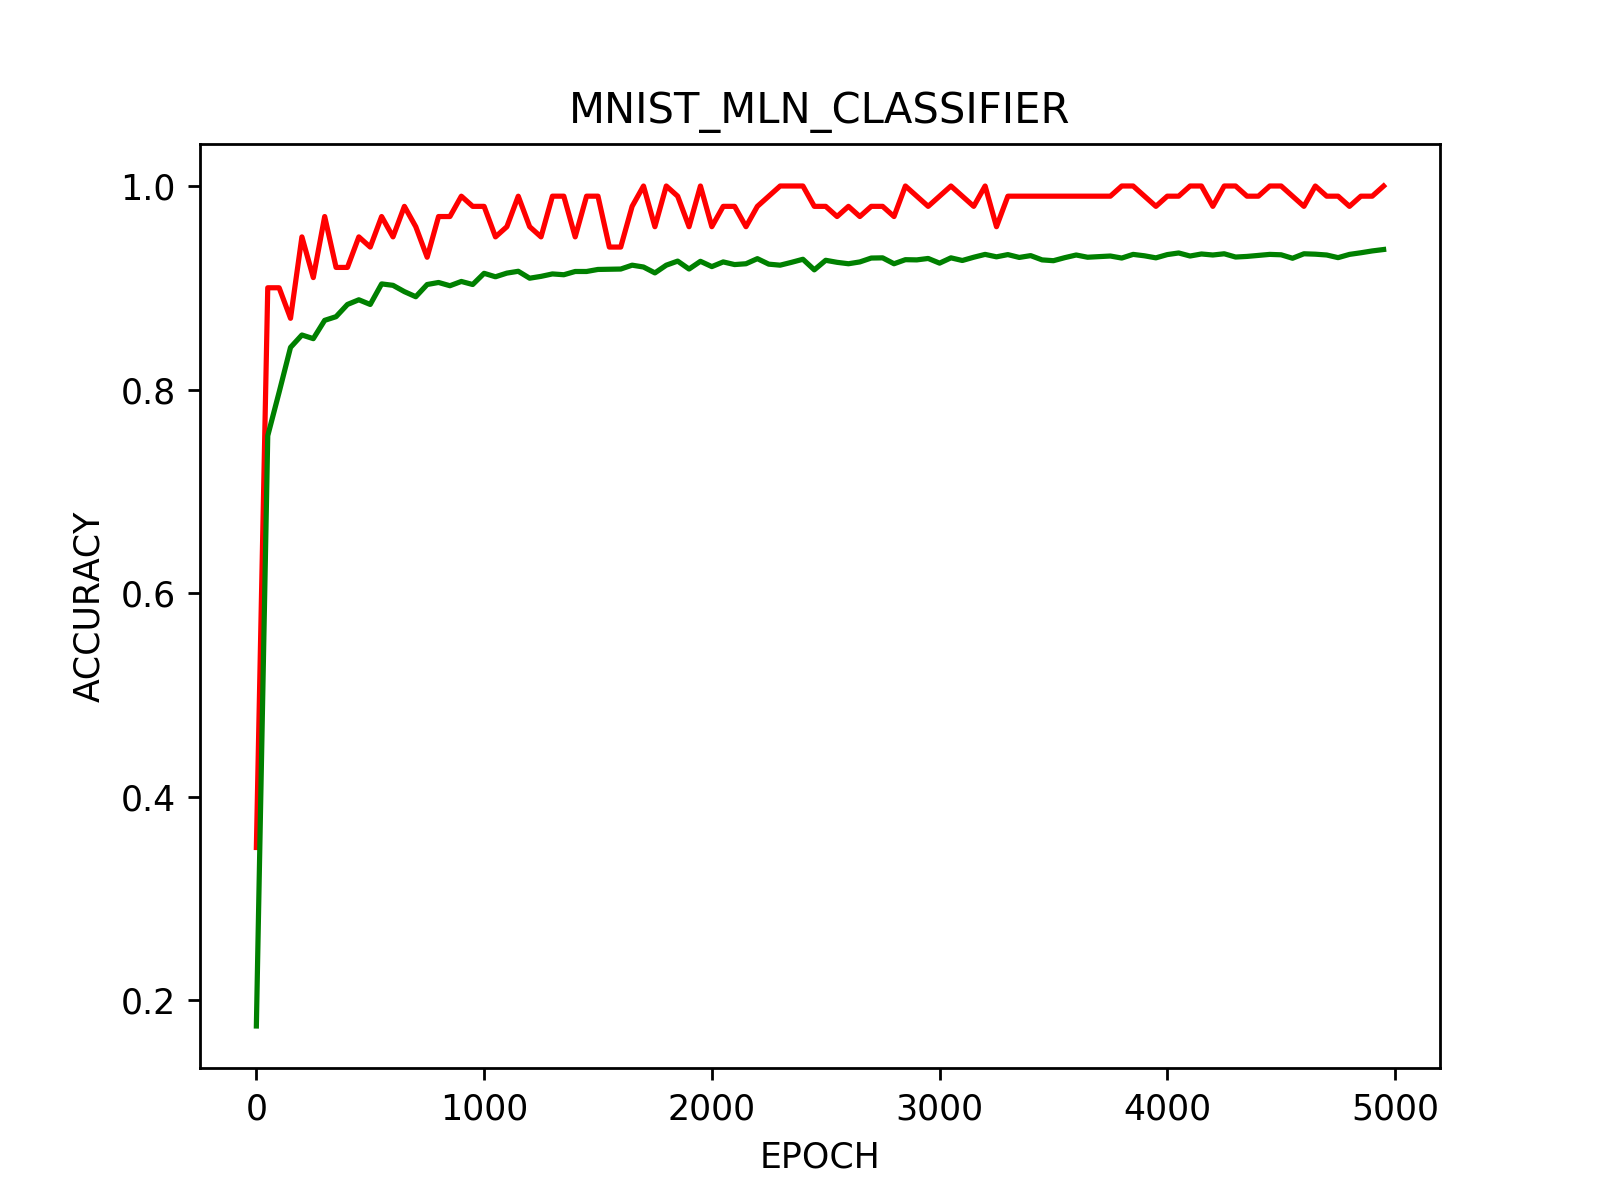

In [8]:
plt.plot(epoch, train_acc, 'r-')
plt.plot(epoch, valid_acc, 'g-')
plt.title('MNIST_MLN_CLASSIFIER')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.show()